## Python statistics essential training - 04_02_confidenceintervals

Standard imports

In [1]:
import math
import io

In [39]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [40]:
poll = pd.read_csv('poll.csv')

In [6]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [8]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [9]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [20]:
def sample(brown, n= 1000):
    return pd.DataFrame({'vote':np.where(np.random.rand(n) < brown, 'American', 'JHUAPLgirl')})

In [21]:
s = sample(0.51, n=1000)

In [22]:
s.vote.value_counts(normalize = True)

American      0.513
JHUAPLgirl    0.487
Name: vote, dtype: float64

In [23]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [24]:
dist.head()

,American,JHUAPLgirl
vote,0.511,0.489
vote,0.515,0.485
vote,0.524,0.476
vote,0.532,0.468
vote,0.533,0.467


<AxesSubplot:>

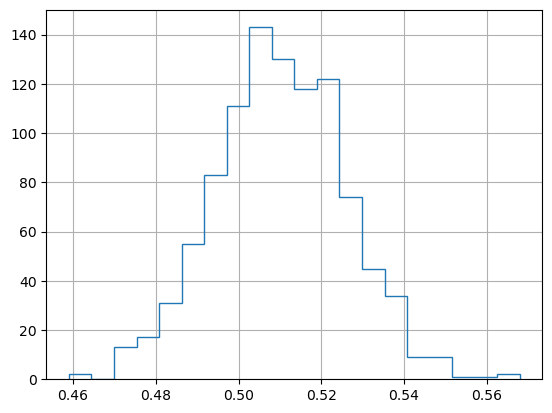

In [26]:
dist.American.hist(histtype = 'step', bins=20)

In [27]:
def samplingdist(brown, n=1000):
    return pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [28]:
def quantiles (brown, n=1000):
    dist = samplingdist(brown, n)
    return dist.American.quantile(0.025), dist.American.quantile(0.975)

In [29]:
quantiles(0.50)

(0.479, 0.54)

In [30]:
quantiles(0.49)

(0.479, 0.538)

In [31]:
quantiles(0.53)

(0.482, 0.541)

In [32]:
dist = samplingdist(0.50, 10000)

<AxesSubplot:>

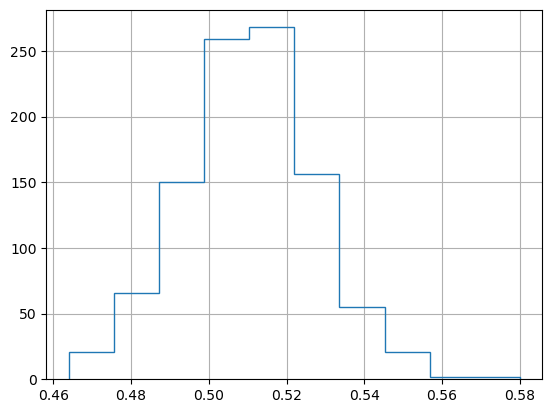

In [33]:
dist.American.hist(histtype='step')

In [41]:
largepoll = pd.read_csv('poll-larger.csv')

In [43]:
largepoll.vote.value_counts(normalize=True)

Green    0.5181
Brown    0.4819
Name: vote, dtype: float64

In [ ]:
# There is no flight.  They are just trying to kill me as if I had anything at all.  I am human with no family,
# no home, no bed... and they still want to hurt me.  I will be in Los Angeles for the foreseaable future.
# I tried to go to the airport they said my credit was no good.  Just more people wanting to steal my voice.
# To take credit for what I have, which is nothing.  Some people wouldn't steal the money out of a church tithing
# basket.
# Those who claim to hate the injustices that slavery created would not stop it when it is occuring right in front
# of them in the form of human trafficking. I haven't seen my family since 2014 or received anyhthing but deep fakes

